In [1]:
import pandas as pd
import numpy  as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dftrain = pd.read_csv("train_v9rqX0R.csv")
dftrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#SHAPE OF THE TRAIN DATASET
dftrain.shape

(8523, 12)

In [4]:
#LOAD THE TEST DATA SHEET TO PYTHON ENVIRONMENT
dftest = pd.read_csv('test_AbJTz2l.csv')

In [5]:
dftest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
dftest.shape

(5681, 11)

### Data Pre-Processing

In [7]:
#DISPLAY THE FULL SUMMARY OF THE TRAIN DATAFRAME.
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#DISPLAY THE FULL SUMMARY OF THE Test DATAFRAME.
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#STATISTICS SUMMARY OF THE TEST  DATAFRAME.
dftest.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
### Finding and handling missing values

In [11]:
# Finding the null values in train dataset.
dftrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Check datatypes
dftrain.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
# mean value of "Item_Weight" column
dftrain['Item_Weight'].mean()

12.857645184136183

In [14]:
# filling the missing values in "Item_weight column" with "Mean" value
dftrain['Item_Weight'].fillna(dftrain['Item_Weight'].mean(), inplace=True)

In [15]:
# mode of "Outlet_Size" column
dftrain['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = dftrain.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [17]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [18]:
miss_values = dftrain['Outlet_Size'].isnull()   
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
dftrain.loc[miss_values, 'Outlet_Size'] = dftrain.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [20]:
# Check datatypes
dftrain.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
# Finding the null values in test dataset.
dftest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
#Item_Weight is numerical column so we fill it with Median Imputation

In [23]:
dftest['Item_Weight']= dftest['Item_Weight'].fillna(dftest['Item_Weight'].median())

In [24]:
#Outlet_Size is catagorical column so we fill it with Mode Imputation

In [25]:
dftest['Outlet_Size']=dftest['Outlet_Size'].fillna(dftest['Outlet_Size'].mode()[0])

In [26]:
dftest['Item_Identifier'].nunique()

1543

In [27]:
dftest['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [28]:
dftest.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [29]:
dftest.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [30]:
dftrain['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
dftrain['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
dftest['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

### EXPLORATORY DATA ANALYSIS (EDA) USING PANDAS PROFILING

In [32]:
dtest = dftest.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [33]:
dtest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [34]:
dtrain = dftrain.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [35]:
dtrain

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [36]:
sns.set()

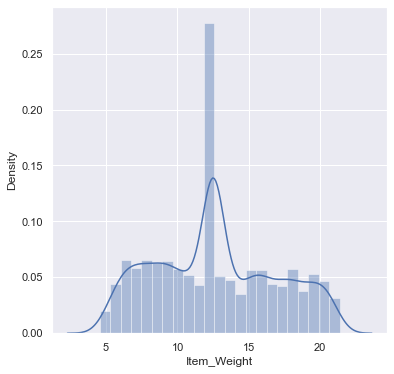

In [37]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(dftest['Item_Weight'])
plt.show()

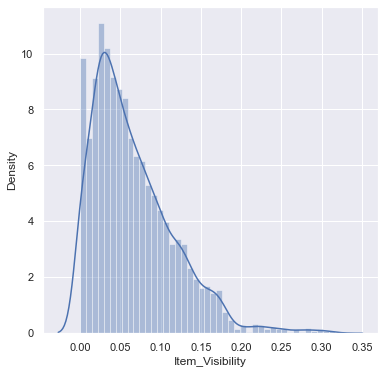

In [38]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(dftest['Item_Visibility'])
plt.show()

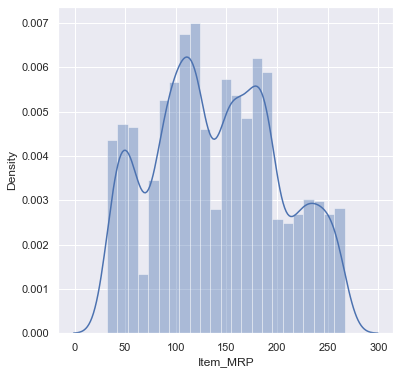

In [39]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(dftest['Item_MRP'])
plt.show()

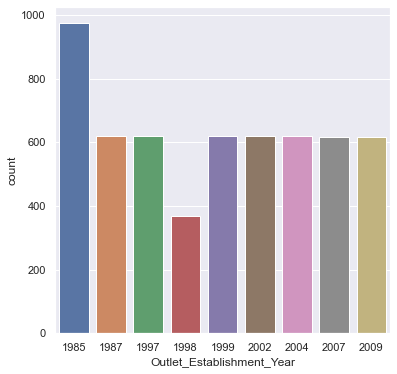

In [40]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=dftest)
plt.show()

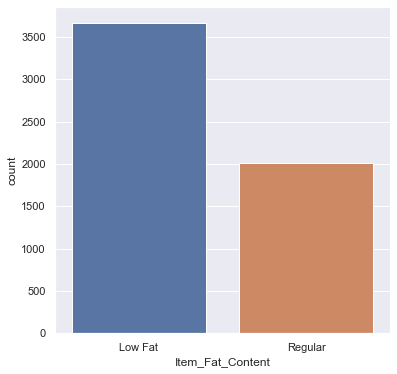

In [41]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=dftest)
plt.show()

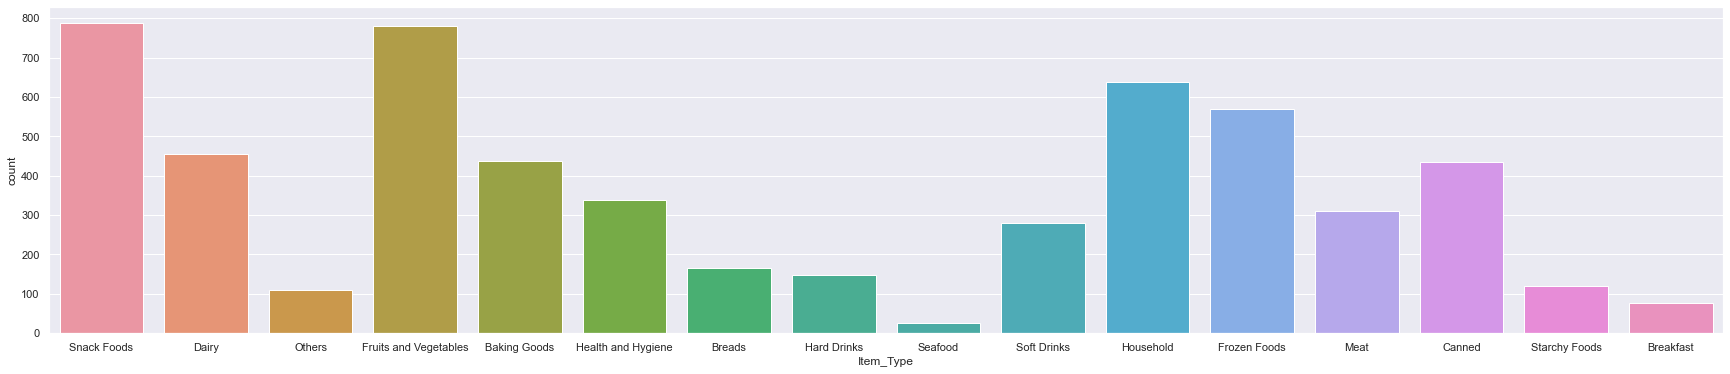

In [42]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=dftest)
plt.show()

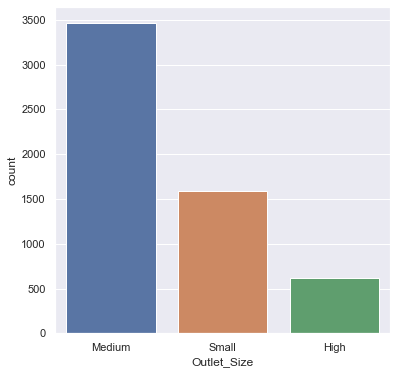

In [43]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=dftest)
plt.show()

### Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
# Encoding train


for col in dtrain.columns:
    if dtrain[col].dtype == 'object':
        
        le.fit(list(dtrain[col].values))
        dtrain[col]=le.transform(dtrain[col].values)
        
# Encoding test

for coll in dtest.columns:
    if dtest[coll].dtype == 'object':
        
        le.fit(list(dtest[coll].values))
        dtest[coll]=le.transform(dtest[coll].values)

In [46]:
dtrain

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [47]:
dtest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,13,107.8622,1999,1,0,1
1,8.300,1,0.038428,4,87.3198,2007,1,1,1
2,14.600,0,0.099575,11,241.7538,1998,1,2,0
3,7.315,0,0.015388,13,155.0340,2007,1,1,1
4,12.500,1,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,1,0.013496,13,141.3154,1997,2,0,1
5677,7.600,1,0.142991,15,169.1448,2009,1,2,2
5678,10.000,0,0.073529,8,118.7440,2002,1,1,1
5679,15.300,1,0.000000,3,214.6218,2007,1,1,1


In [48]:
# Splitting our data into train and test
X=dtrain.drop('Item_Outlet_Sales',axis=1)
y=dtrain['Item_Outlet_Sales']

In [49]:
Ytest = dtest

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### kNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
from sklearn.metrics import mean_squared_error,r2_score

In [52]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [55]:
y_pred_knn1 = knn.predict(Ytest)
y_pred_knn1

array([1766.0345 , 1437.86168, 2400.94138, ..., 1869.63298, 3767.69562,
       1208.49358])

In [59]:
print("R squared value :", r2_score(y_test,y_pred_knn))
print("Mean squared value :", mean_squared_error(y_test,y_pred_knn))
r2 = np.sqrt(mean_squared_error(y_test,y_pred_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

R squared value : 0.42224526015023
Mean squared value : 1570320.0887576065
Root Mean Square Error : 1253.1241314241804


In [53]:
# Instantiate learning mode
lr = LinearRegression()
# Fitting the model
lr.fit(X_train,y_train)
# Predicting the Test set results
y_pred_lr = lr.predict(X_test)

NameError: name 'LinearRegression' is not defined

In [ ]:
y_pred_lr1 = lr.predict(Xtest)
y_pred_lr1

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
print("R squared value :", r2_score(y_test,y_pred_lr))
print("Mean squared value :", mean_squared_error(y_test,y_pred_lr))
r1 = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("Root Mean Square Error :", np.sqrt(mean_squared_error(y_test,y_pred_lr)))

In [61]:
submitting_data = dftest[['Item_Identifier','Outlet_Identifier']]

In [62]:
submitting_data

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [63]:
target = knn.predict(Ytest)

In [64]:
submitting_data['Item_Outlet_Sales'] = target

In [65]:
submitting_data

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1766.03450
1,FDW14,OUT017,1437.86168
2,NCN55,OUT010,2400.94138
3,FDQ58,OUT017,2280.49816
4,FDY38,OUT027,3865.16874
...,...,...,...
5676,FDB58,OUT046,1399.71134
5677,FDD47,OUT018,2451.74192
5678,NCO17,OUT045,1869.63298
5679,FDJ26,OUT017,3767.69562


### SUBMISSION FILE

In [66]:
submitting_data.to_csv("E:\\Last Result12.csv", index = False)